### Initialize the environment

In [1]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [3]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [4]:
run=0
uuid='eb6856a251bb8680da6593de98db7b5a'
timestamp='20170220T205506' # specify the date and time of the run in the format YYYYmmddTHHMMSS
run_dir=run_dir_prefix+timestamp
runfile='Exp_%s_run_%s.npz' % (uuid, run) # location of the experiment results
mdbn = MDBN.MDBN()
config, dbn_dict = mdbn.load_network(runfile, run_dir)

### Configuration of the experiment

In [5]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [20],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'name': u'aml_config_20_1_05.json',
 u'p': 0.5,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'

### Load the dataset and visualize the input of the pathways

In [6]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [7]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

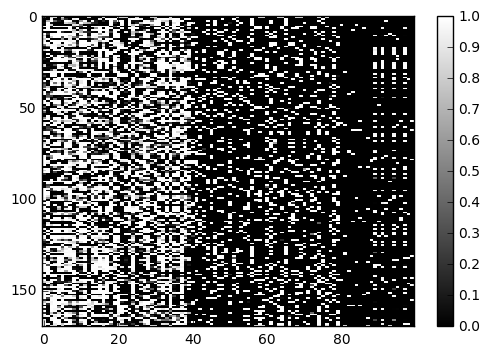

In [8]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [9]:
joint_layer[1:10,1:10]

array([[  3.54498532e-03,   9.68264043e-01,   1.58789571e-05,
          1.43725076e-04,   5.65388203e-01,   1.58122092e-01,
          1.91909494e-03,   9.29199278e-01,   9.75213706e-01],
       [  6.87696517e-01,   9.99528527e-01,   3.80846590e-01,
          9.58603173e-02,   1.69651618e-03,   9.99985158e-01,
          9.99352038e-01,   6.14848472e-02,   1.26754312e-04],
       [  9.97018397e-01,   7.49598071e-02,   6.05323445e-03,
          4.89641214e-04,   7.28196892e-06,   8.40969086e-01,
          7.51088619e-01,   5.30721784e-01,   4.58242446e-02],
       [  9.99294937e-01,   8.15736413e-01,   1.17231735e-07,
          6.16892422e-08,   7.21758965e-07,   7.03742588e-03,
          5.02763875e-03,   8.83783996e-01,   9.35936987e-01],
       [  9.98012245e-01,   6.69994056e-02,   9.99994397e-01,
          9.99994874e-01,   9.99123991e-01,   9.98598158e-01,
          9.97912526e-01,   2.36577198e-01,   9.24622524e-04],
       [  1.00000000e+00,   1.24667636e-07,   1.60419949e-13,
   

### Check the weights distributions

([array([  3.00000000e+00,   2.32000000e+02,   1.74600000e+03,
           5.58200000e+03,   6.69700000e+03,   4.25800000e+03,
           1.26100000e+03,   1.55000000e+02,   3.00000000e+00,
           0.00000000e+00]),
  array([    0.,    41.,  1218.,  5717.,  6785.,  4301.,  1641.,   234.,
             0.,     0.]),
  array([  1.00000000e+00,   1.77000000e+02,   2.00400000e+03,
           7.33900000e+03,   6.75700000e+03,   2.86600000e+03,
           7.00000000e+02,   8.90000000e+01,   4.00000000e+00,
           0.00000000e+00]),
  array([  4.00000000e+00,   1.10000000e+02,   1.19500000e+03,
           4.61800000e+03,   6.79700000e+03,   4.93700000e+03,
           1.96100000e+03,   3.00000000e+02,   1.50000000e+01,
           0.00000000e+00]),
  array([    0.,    72.,  1516.,  5723.,  7162.,  4414.,   990.,    60.,
             0.,     0.]),
  array([  1.00000000e+00,   1.94000000e+02,   1.79800000e+03,
           6.25500000e+03,   7.26000000e+03,   3.64300000e+03,
           7.6500000

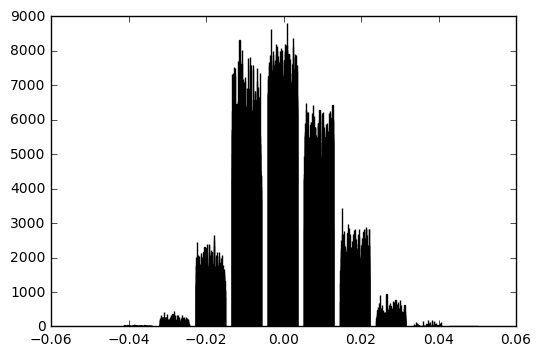

In [10]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x12dbd2c90>,
 <a list of 3 Text xticklabel objects>)

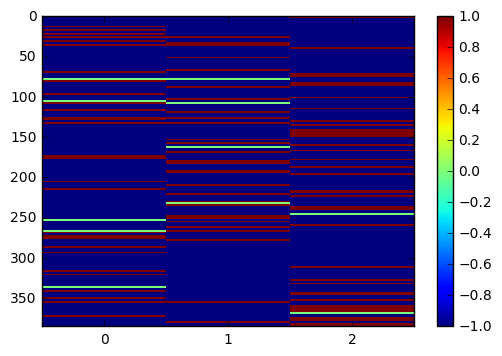

In [11]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x132f8e090>,
 <a list of 3 Text xticklabel objects>)

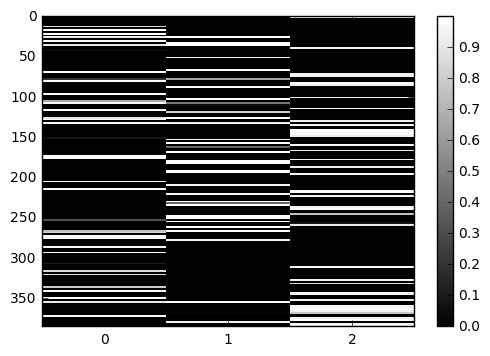

In [12]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 135.,    1.,    1.,    1.,    0.,    0.,    1.,    2.,    5.,   24.]),
  array([ 137.,    0.,    0.,    0.,    3.,    0.,    1.,    0.,    1.,   28.]),
  array([ 129.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    1.,   38.])],
 array([  9.31479253e-26,   9.99985456e-02,   1.99997091e-01,
          2.99995637e-01,   3.99994183e-01,   4.99992728e-01,
          5.99991274e-01,   6.99989820e-01,   7.99988365e-01,
          8.99986911e-01,   9.99985456e-01]),
 <a list of 3 Lists of Patches objects>)

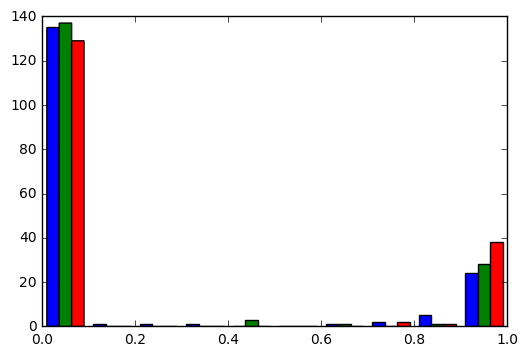

In [13]:
plt.hist(top_output)

In [14]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [15]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 73.,  41.,  24.,  26.,   6.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

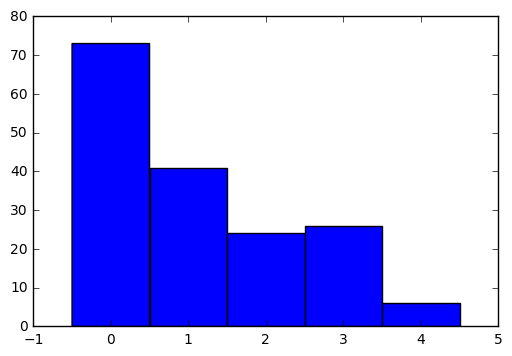

In [16]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [17]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [18]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [19]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


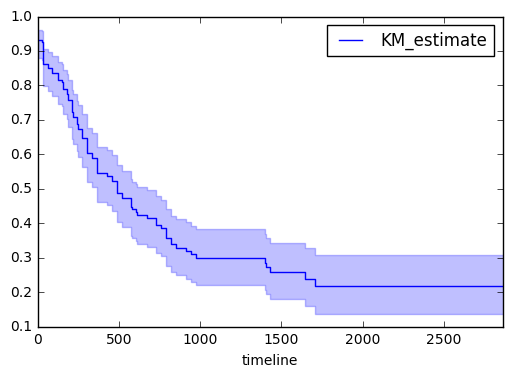

In [20]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

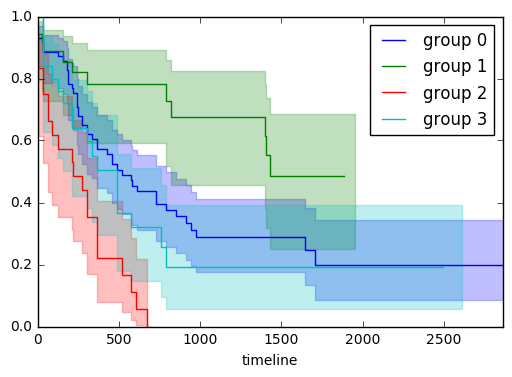

In [21]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in range(1,4):
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)